# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-08-12 14:00:43.200376


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/11/20


,8/11/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,5141208,164537,3.20
Brazil,3109630,103026,3.31
Mexico,492522,53929,10.95
United Kingdom,313394,46611,14.87
India,2329638,46091,1.98
Italy,251237,35215,14.02
France,239355,30328,12.67


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 8/11/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
35116,US,5044864,2020-08-09,162938.0,515.0,46935.0,53813.142857
35115,US,4997929,2020-08-08,162423.0,1076.0,56174.0,53905.285714
35114,US,4941755,2020-08-07,161347.0,1243.0,58173.0,54235.428571
35113,US,4883582,2020-08-06,160104.0,1250.0,59692.0,55509.571429
35112,US,4823890,2020-08-05,158854.0,1372.0,52810.0,56701.142857
35111,US,4771080,2020-08-04,157482.0,1378.0,57540.0,59267.714286
35110,US,4713540,2020-08-03,156104.0,539.0,45368.0,60457.571429


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/11/20


,8/11/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,422003,32787.0,7.77
New Jersey,185475,15890.0,8.57
California,578946,10523.0,1.82
Texas,517700,9222.0,1.78
Massachusetts,121707,8751.0,7.19
Florida,542792,8553.0,1.58
Illinois,198248,7866.0,3.97


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 8/11/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1215,California,559746,2020-08-09,10377.0,70.0,5358.0,6795.857143
1214,California,554388,2020-08-08,10307.0,174.0,7574.0,6825.000000
1213,California,546814,2020-08-07,10133.0,112.0,5475.0,6608.285714
1212,California,541339,2020-08-06,10021.0,213.0,10733.0,6915.000000
1211,California,530606,2020-08-05,9808.0,124.0,3921.0,6527.571429
1210,California,526685,2020-08-04,9684.0,243.0,9834.0,7989.000000
1209,California,516851,2020-08-03,9441.0,45.0,4676.0,8390.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 8/11/20


,8/11/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,210874,4999.0,2.37
Riverside,41983,820.0,1.95
Orange,40527,724.0,1.79
San Diego,32975,594.0,1.80
San Bernardino,36072,546.0,1.51
Imperial,9867,244.0,2.47
San Joaquin,13870,235.0,1.69


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 8/11/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3854,Los Angeles,208563,2020-08-09,4977.0,10.0,1785.0,2340.857143
3853,Los Angeles,206778,2020-08-08,4967.0,48.0,2520.0,2274.428571
3852,Los Angeles,204258,2020-08-07,4919.0,50.0,3058.0,2245.285714
3851,Los Angeles,201200,2020-08-06,4869.0,42.0,3035.0,2166.285714
3850,Los Angeles,198165,2020-08-05,4827.0,67.0,2360.0,2101.285714
3849,Los Angeles,195805,2020-08-04,4760.0,58.0,1928.0,2451.857143
3848,Los Angeles,193877,2020-08-03,4702.0,9.0,1700.0,2549.857143
3847,Los Angeles,192177,2020-08-02,4693.0,24.0,1320.0,2594.285714
3846,Los Angeles,190857,2020-08-01,4669.0,45.0,2316.0,2647.428571
3845,Los Angeles,188541,2020-07-31,4624.0,65.0,2505.0,2800.857143



7 day new US cases as of 8/11/20


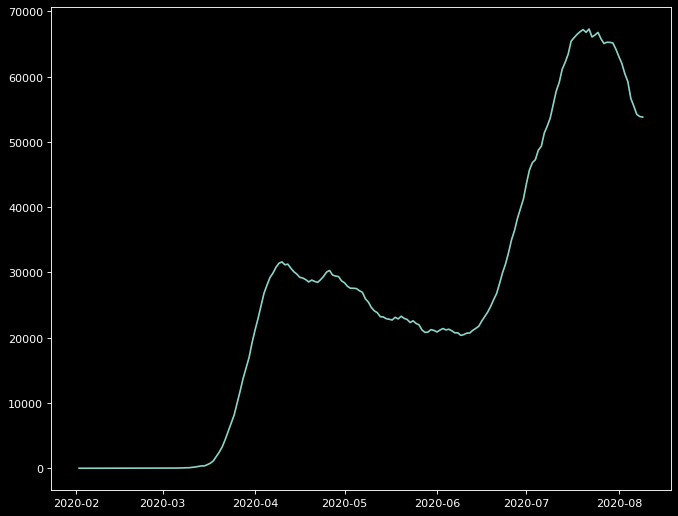

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 8/11/20


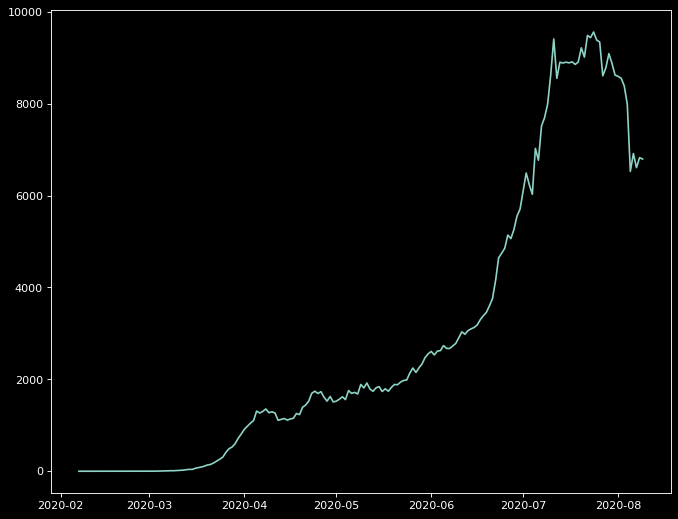

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 8/11/20


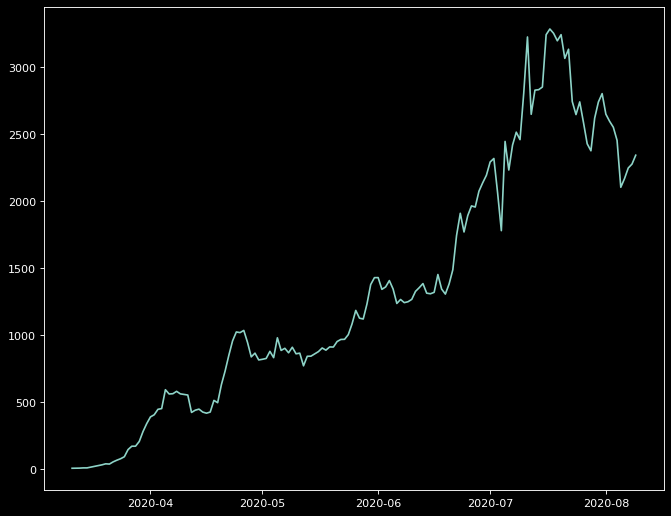

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()